## What is Residual Analysis ?

Residuals are the differences between the actual values (what we're trying to predict) and the predicted values from our model.

## Key Assumptions to Check with Residuals

1. Linearity : The Relationship between features and target is a straight line.
2. Independence: Each residual should be independent from the others, meaning there is no correlation between errors in different observations. 
3. Normality: The distribution of residuals should approximate a normal distribution, which can be checked using a normality plot (like a Q-Q plot). 

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
# Load Data
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

In [18]:
# Split data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict
y_pred = model.predict(X_test)

## Step 2 : Calculate Residuals

In [21]:
# Residuals = actual - predicted
residuals = y_test - y_pred

In [22]:
# Quick peek
print("First 5 Residuals :")
print(pd.DataFrame({'Actual':y_test[:5], 'Predicted':y_pred[:5], 'Residual':residuals[:5]}))

First 5 Residuals :
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


- Positive Residual : Model underpredicted (e.g, 0.560 = $56K too low)
- Negative Residual : Model predicted

## Step 3 : Residual Plots

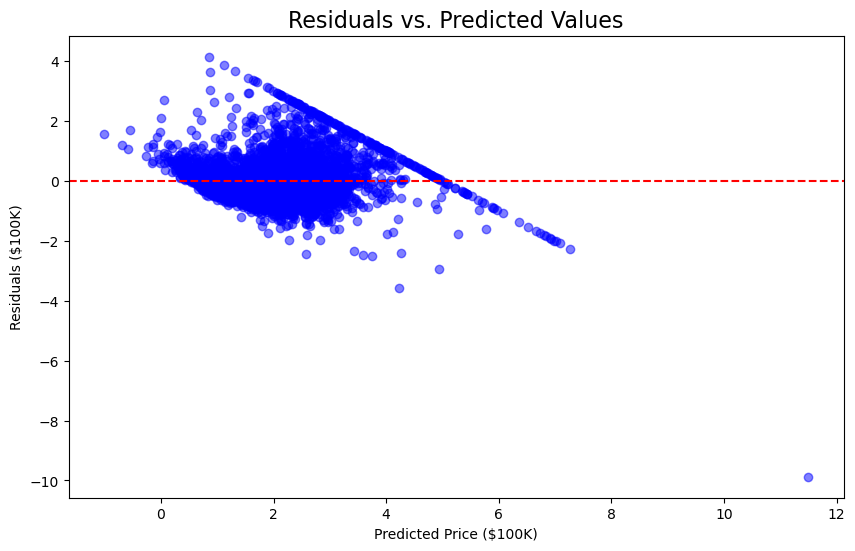

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') # Zero Line
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Price ($100K)')
plt.ylabel('Residuals ($100K)')
plt.show()

## Plot 2 : Histogram of Residuals

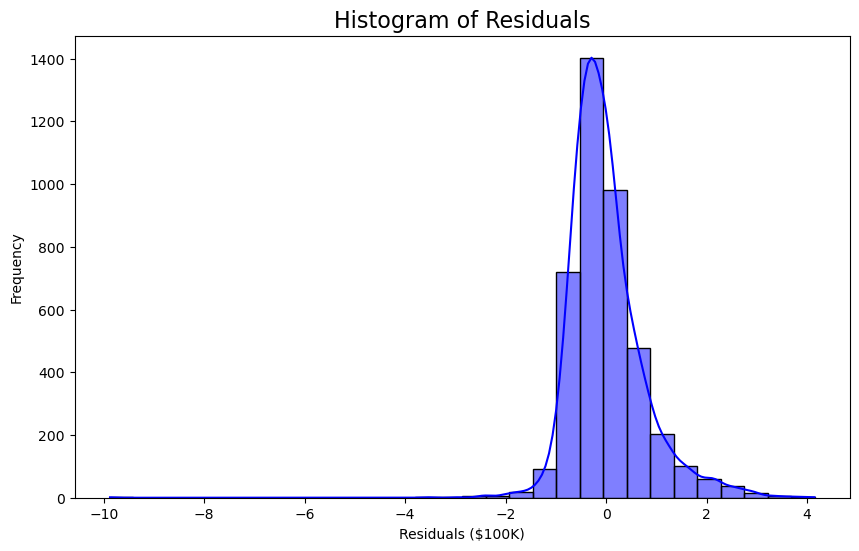

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Histogram of Residuals', fontsize=16)
plt.xlabel('Residuals ($100K)')
plt.ylabel('Frequency')
plt.show()

- What to Look For :
    - Good : Bell-shaped curve (normal).
    - Bad : Skewed or multi-peaked
- Our Case : Roughly normal, but a bit skewed-

## Q-Q Plot (Normality Check)

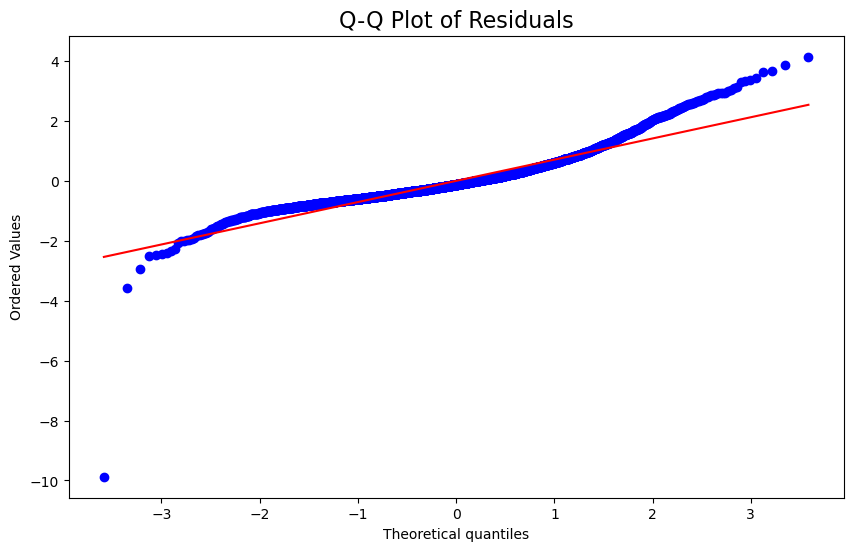

In [25]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=16)
plt.show()

- What to Look For :
    - Good : Points follow the red line (normal).
    - Bad : Big Deviations, especially at ends.
- Our Case : Mostly linear, but tails curve off - non-normal extremes (capping effect).

## Step 4 : Interpret Residual Analysis

- Linearity : Scatter plot shows no strong curve - assumption holds decently.
- Constant Variance : Slight fanning at higher prices - mild heteroscedasticity (variance grows)
- Normality : Histogram and Q-Q show approximate normality, but tails suggest outliers or capping ($500K limit skews residuals)

## Step 5 : Metrics to Support Analysis

## Standardization vs Normalization

- Both Standardization and Normalization are techniques used for scaling.

## Standardization

- Standardization transforms the data to have a mean of 0 and a standard deviation if 1

- Formula : Xstandardized = (X - μ) / σ

Where:
- X = Original fetaure value
- μ = Mean of the feature
- σ = Standard deviation of the feature

## Normalization

- Normalization transforms data into a fixed range, typically [0,1] or [-1,1]. 

- Formula (Min-Max Scaling): X' = X - Xmin / Xmax - Xmin

Where:
- X = Original value
- X min = Minimum value in the dataset
- X max = Maximum value in the dataset
- X normalized = Normalized value in the range [0,1]

## Cross-Validation : A Technique to Improve Model Performance

Cross-Validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets for training and testing. This helps in avoiding overfitting and ensures that the model generalizes well to unseen data.

## Why Use Cross-Validation ?

- Prevent Overfitting
- Ensures the model is evaluated on different subsets of the data.
- Provides a more reliable performance estimate than a single test-train.

## K-Fold Cross-Validation

### How it works?

- Split the dataset into K equal-sized folds.
- Train the model on K-1 folds and test on the remaining fold.
- Repeat the process K times, each time using a different fold as the test set.
- Compute the average performance across all K iterations.

In [26]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate Synthetic Data
X, y = make_regression(n_samples=100, n_features=2, noise=20)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Perform Cross-Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print('Cross-Validation scores : ', scores)
print('Average score : ', scores.mean())

Cross-Validation scores :  [0.9483618  0.93059436 0.88109205 0.8850816  0.89406916]
Average score :  0.9078397943980286
